In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Load data
print("Loading data...")

try:
    df = pd.read_csv(r'C:\Users\admin\credit-risk-model\data\raw\data.csv')
    print(f"Data loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("Data file not found. Using sample structure...")
    # Create sample data for demonstration
    np.random.seed(42)
    n_samples = 10000
    df = pd.DataFrame({
        'TransactionId': [f'TXN{i:06d}' for i in range(n_samples)],
        'BatchId': np.random.randint(1000, 2000, n_samples),
        'AccountId': np.random.randint(1, 500, n_samples),
        'SubscriptionId': np.random.randint(1, 1000, n_samples),
        'CustomerId': [f'CUST{i:04d}' for i in np.random.randint(1, 300, n_samples)],
        'CurrencyCode': np.random.choice(['USD', 'EUR', 'GBP', 'KES'], n_samples),
        'CountryCode': np.random.choice([254, 255, 256, 257], n_samples),
        'ProviderId': np.random.choice(['P1', 'P2', 'P3', 'P4', 'P5'], n_samples),
        'ProductId': [f'PROD{i:03d}' for i in np.random.randint(1, 50, n_samples)],
        'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Food', 'Services', 'Other'], n_samples),
        'ChannelId': np.random.choice(['Web', 'Android', 'iOS', 'PayLater', 'Checkout'], n_samples),
        'Amount': np.random.normal(100, 50, n_samples).round(2),
        'Value': np.abs(np.random.normal(100, 50, n_samples)).round(2),
        'TransactionStartTime': pd.date_range('2023-01-01', periods=n_samples, freq='H'),
        'PricingStrategy': np.random.choice(['Standard', 'Premium', 'Economy', 'Custom'], n_samples),
        'FraudResult': np.random.binomial(1, 0.02, n_samples)
    })
    df.loc[np.random.choice(df.index, size=int(n_samples*0.05), replace=False), 'Amount'] = np.nan
    df.loc[np.random.choice(df.index, size=int(n_samples*0.03), replace=False), 'Value'] = np.nan


Loading data...
Data loaded successfully: 95662 rows, 16 columns


In [3]:

# 1. DATA OVERVIEW

print("\n" + "="*60)
print("1. DATA OVERVIEW")
print("="*60)

# Basic information
print(f"Dataset shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)

print(f"\nFirst 5 rows:")
display(df.head())

print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


1. DATA OVERVIEW
Dataset shape: (95662, 16)

Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First 5 rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



Column names:
 1. TransactionId
 2. BatchId
 3. AccountId
 4. SubscriptionId
 5. CustomerId
 6. CurrencyCode
 7. CountryCode
 8. ProviderId
 9. ProductId
10. ProductCategory
11. ChannelId
12. Amount
13. Value
14. TransactionStartTime
15. PricingStrategy
16. FraudResult


In [4]:

# 2. SUMMARY STATISTICS

print("\n" + "="*60)
print("2. SUMMARY STATISTICS")
print("="*60)

# Numerical columns summary
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns ({len(numerical_cols)}): {list(numerical_cols)}")

print("\nDescriptive statistics for numerical features:")
display(df[numerical_cols].describe())

# Categorical columns summary
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"\nCategorical columns ({len(categorical_cols)}): {list(categorical_cols)}")

print("\nCategorical features summary:")
for col in categorical_cols:
    if col not in ['TransactionId', 'CustomerId']:  # Skip high-cardinality IDs
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Top 5 values:")
        display(df[col].value_counts().head())


2. SUMMARY STATISTICS
Numerical columns (5): ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']

Descriptive statistics for numerical features:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



Categorical columns (11): ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']

Categorical features summary:

BatchId:
  Unique values: 94809
  Top 5 values:


BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64


AccountId:
  Unique values: 3633
  Top 5 values:


AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
Name: count, dtype: int64


SubscriptionId:
  Unique values: 3627
  Top 5 values:


SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
Name: count, dtype: int64


CurrencyCode:
  Unique values: 1
  Top 5 values:


CurrencyCode
UGX    95662
Name: count, dtype: int64


ProviderId:
  Unique values: 6
  Top 5 values:


ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
Name: count, dtype: int64


ProductId:
  Unique values: 23
  Top 5 values:


ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
Name: count, dtype: int64


ProductCategory:
  Unique values: 9
  Top 5 values:


ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
Name: count, dtype: int64


ChannelId:
  Unique values: 4
  Top 5 values:


ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


TransactionStartTime:
  Unique values: 94556
  Top 5 values:


TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
Name: count, dtype: int64


3. DISTRIBUTION OF NUMERICAL FEATURES


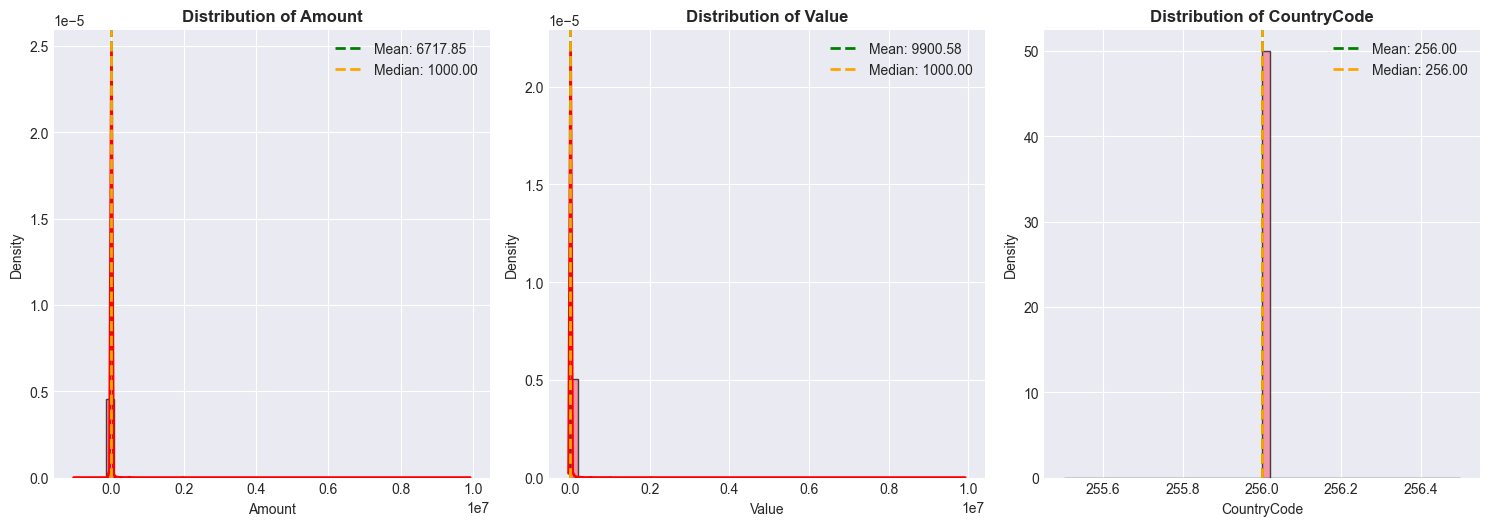

In [5]:

# 3. DISTRIBUTION OF NUMERICAL FEATURES

print("\n" + "="*60)
print("3. DISTRIBUTION OF NUMERICAL FEATURES")
print("="*60)

# Select key numerical features for visualization
key_numerical = ['Amount', 'Value', 'CountryCode'] if 'CountryCode' in numerical_cols else ['Amount', 'Value']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(key_numerical[:6]):
    # Histogram with KDE
    axes[i].hist(df[col].dropna(), bins=50, alpha=0.7, density=True, edgecolor='black')
    sns.kdeplot(df[col].dropna(), ax=axes[i], color='red', linewidth=2)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i].legend()

# Remove empty subplots
for i in range(len(key_numerical), 6):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('../data/processed/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for col in key_numerical:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    print(f"{col}: Skewness = {skew:.3f}, Kurtosis = {kurt:.3f}")



Skewness and Kurtosis:
Amount: Skewness = 51.098, Kurtosis = 3363.128
Value: Skewness = 51.291, Kurtosis = 3378.069
CountryCode: Skewness = 0.000, Kurtosis = 0.000



4. DISTRIBUTION OF CATEGORICAL FEATURES


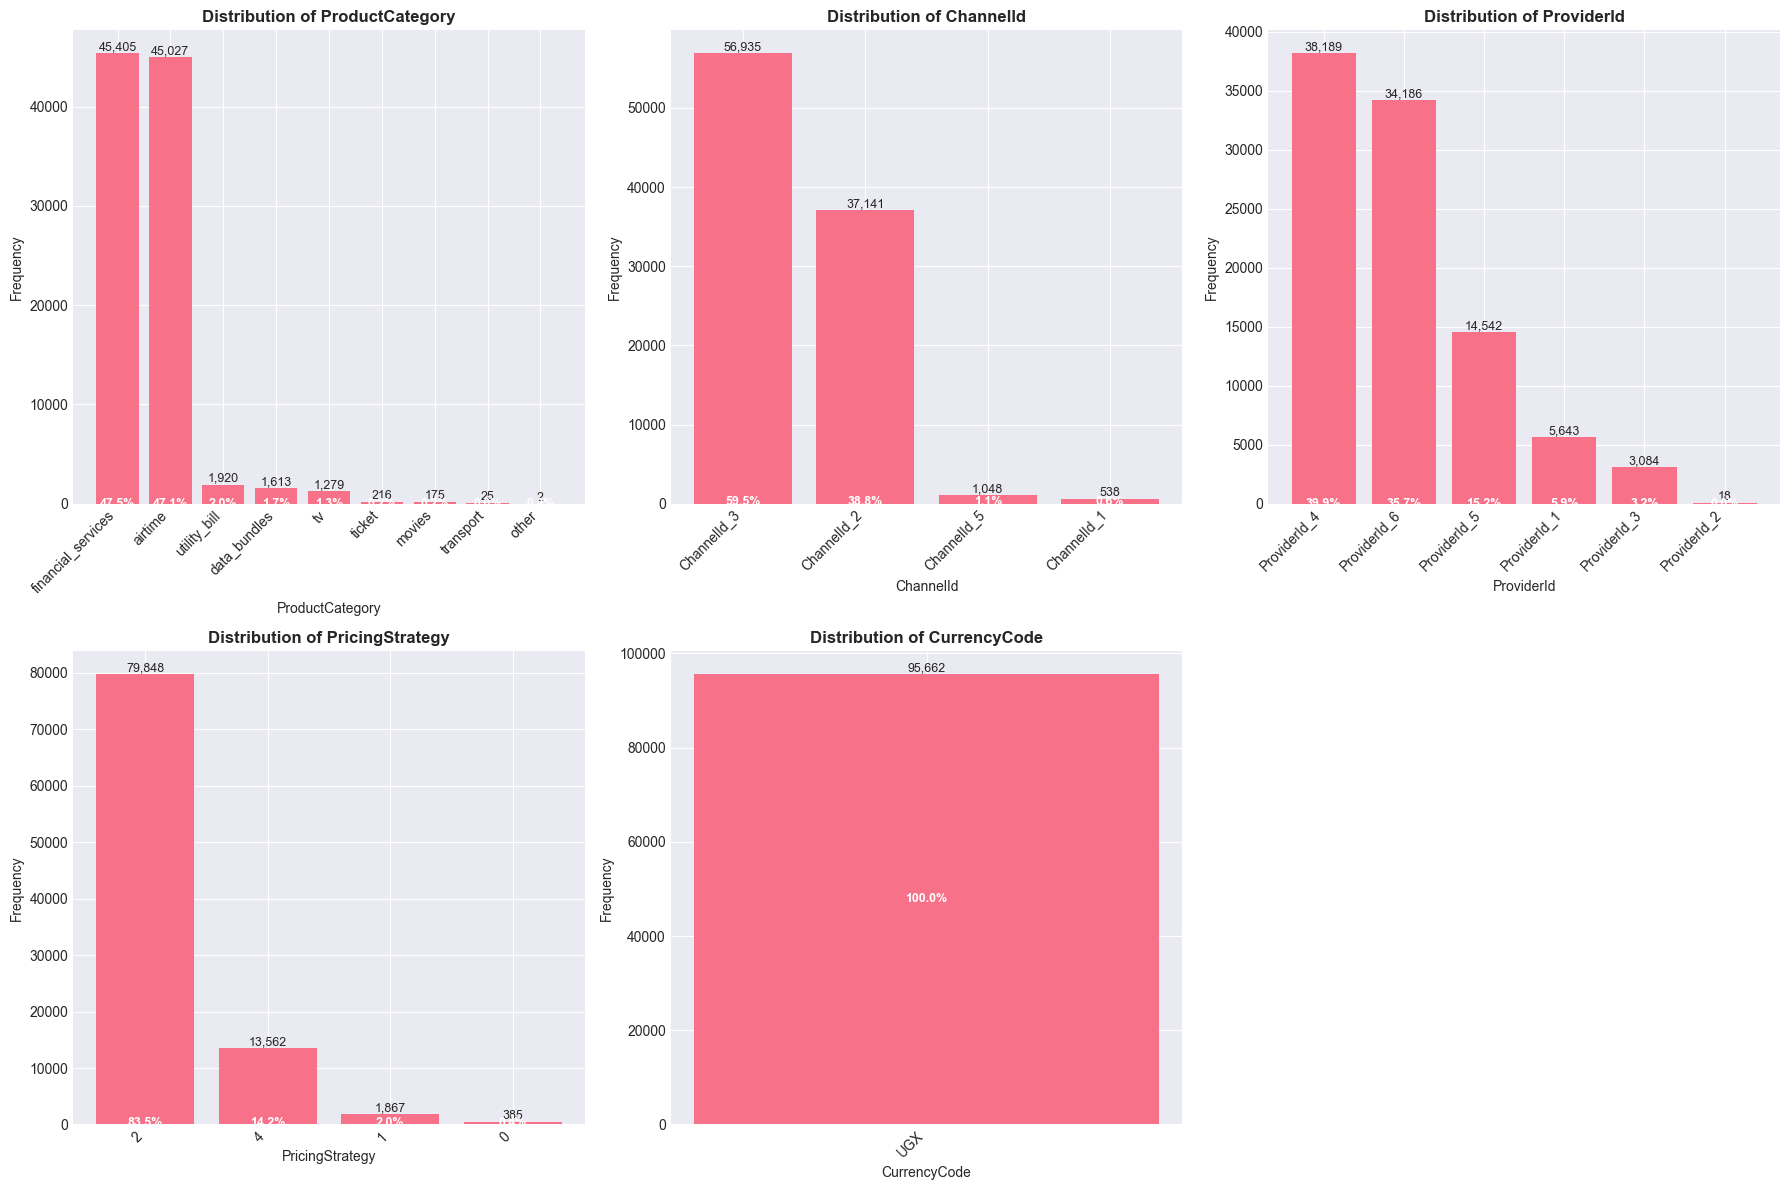

In [7]:

# 4. DISTRIBUTION OF CATEGORICAL FEATURES

print("\n" + "="*60)
print("4. DISTRIBUTION OF CATEGORICAL FEATURES")
print("="*60)

# Select key categorical features
key_categorical = ['ProductCategory', 'ChannelId', 'ProviderId', 'PricingStrategy', 'CurrencyCode']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(key_categorical[:6]):
    if col in df.columns:
        # Get value counts
        value_counts = df[col].value_counts()
        
        # Create bar plot
        bars = axes[i].bar(range(len(value_counts)), value_counts.values)
        axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        
        # Add count labels on bars
        for j, (bar, count) in enumerate(zip(bars, value_counts.values)):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{count:,}', ha='center', va='bottom', fontsize=9)
        
        # Add percentage labels
        total = value_counts.sum()
        for j, (bar, count) in enumerate(zip(bars, value_counts.values)):
            percentage = 100 * count / total
            axes[i].text(bar.get_x() + bar.get_width()/2., height/2,
                        f'{percentage:.1f}%', ha='center', va='center', 
                        color='white', fontweight='bold', fontsize=9)

# Remove empty subplots
for i in range(len(key_categorical), 6):
    if i < len(axes):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig(r'C:/Users/admin/credit-risk-model/data/processed/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


5. CORRELATION ANALYSIS


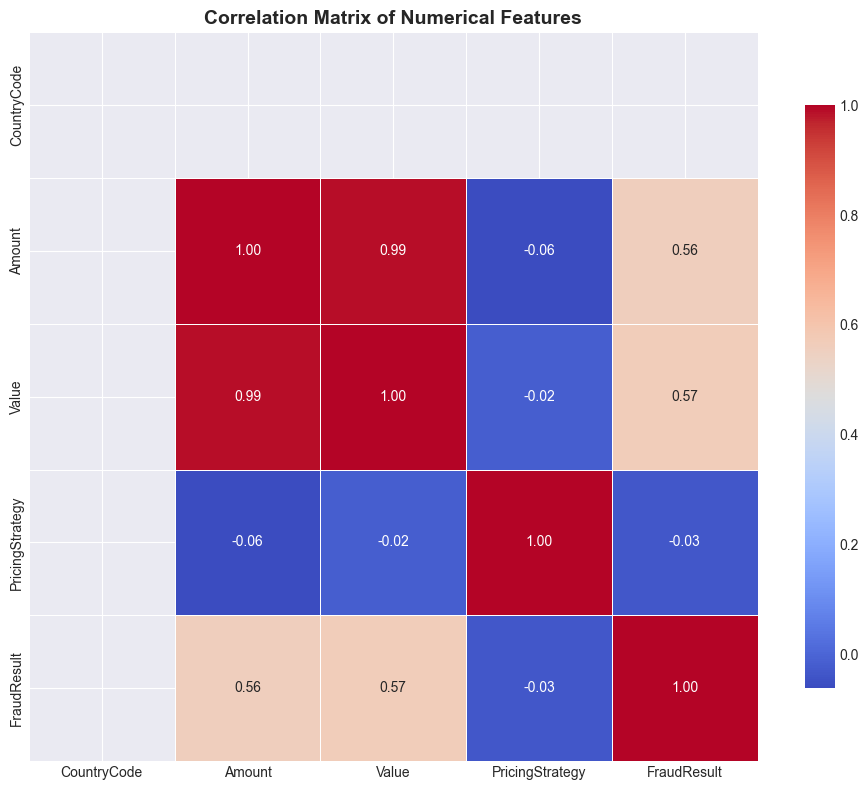


Top correlations (absolute value > 0.5):
Amount vs Value: 0.990
Amount vs FraudResult: 0.557
Value vs FraudResult: 0.567


In [8]:

# 5. CORRELATION ANALYSIS

print("\n" + "="*60)
print("5. CORRELATION ANALYSIS")
print("="*60)

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../data/processed/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Strong correlations
print("\nTop correlations (absolute value > 0.5):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) > 0.5:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            print(f"{col1} vs {col2}: {corr:.3f}")

In [9]:

# 6. MISSING VALUES ANALYSIS
print("\n" + "="*60)
print("6. MISSING VALUES ANALYSIS")
print("="*60)

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values('Percentage', ascending=False)

print("Missing values by column:")
display(missing_df[missing_df['Missing Values'] > 0])

# Visualize missing values
if missing_df['Missing Values'].sum() > 0:
    plt.figure(figsize=(12, 6))
    bars = plt.bar(missing_df.index, missing_df['Percentage'])
    plt.title('Percentage of Missing Values by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values (%)')
    plt.xticks(rotation=45, ha='right')
    plt.axhline(y=5, color='r', linestyle='--', alpha=0.7, label='5% threshold')
    plt.axhline(y=30, color='orange', linestyle='--', alpha=0.7, label='30% threshold')
    
    # Add percentage labels
    for bar, percentage in zip(bars, missing_df['Percentage']):
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)
    
    plt.legend()
    plt.tight_layout()
    plt.savefig('../data/processed/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()



6. MISSING VALUES ANALYSIS
Missing values by column:


,Missing Values,Percentage



7. OUTLIER DETECTION

Amount:
  Q1: -50.00, Q3: 2800.00, IQR: 2850.00
  Lower bound: -4325.00, Upper bound: 7075.00
  Number of outliers: 24441 (25.55%)

Value:
  Q1: 275.00, Q3: 5000.00, IQR: 4725.00
  Lower bound: -6812.50, Upper bound: 12087.50
  Number of outliers: 9021 (9.43%)

CountryCode:
  Q1: 256.00, Q3: 256.00, IQR: 0.00
  Lower bound: 256.00, Upper bound: 256.00
  Number of outliers: 0 (0.00%)


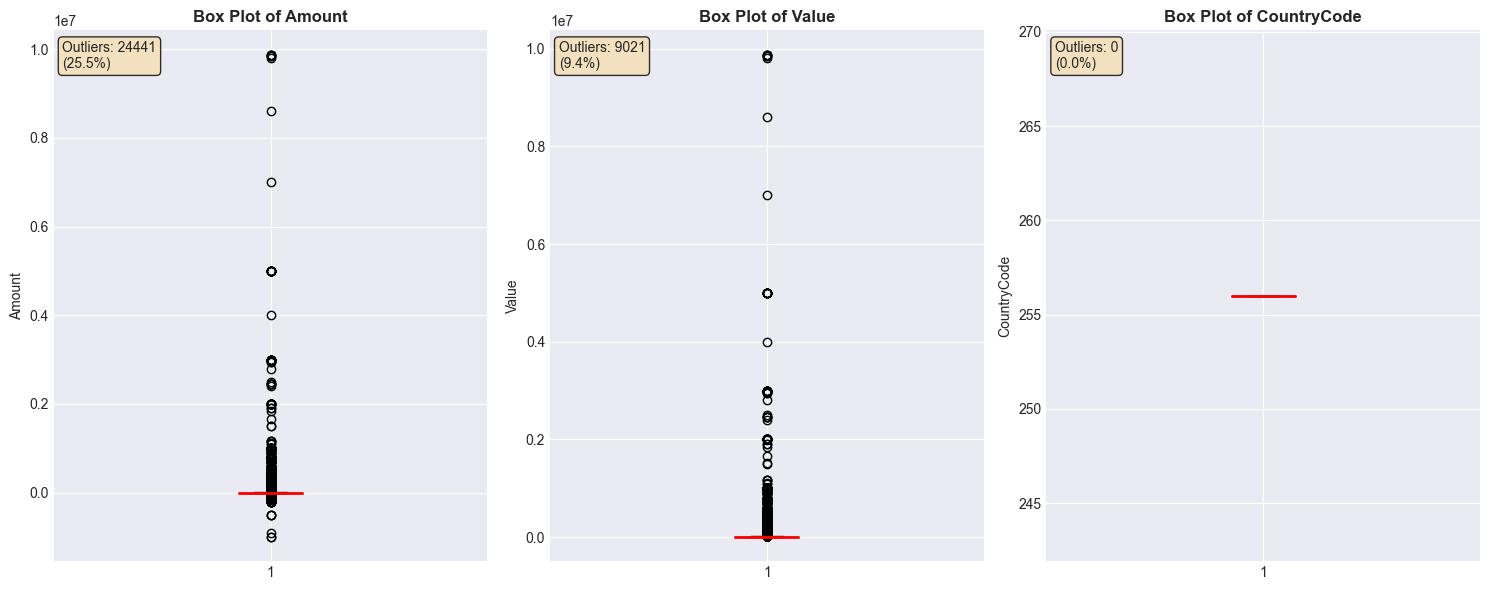

In [10]:

# 7. OUTLIER DETECTION

print("\n" + "="*60)
print("7. OUTLIER DETECTION")
print("="*60)

# Box plots for numerical features
fig, axes = plt.subplots(1, min(3, len(key_numerical)), figsize=(15, 6))
if len(key_numerical) == 1:
    axes = [axes]

for i, col in enumerate(key_numerical[:3]):
    # Create box plot
    bp = axes[i].boxplot(df[col].dropna(), patch_artist=True, 
                        boxprops=dict(facecolor='lightblue'),
                        medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col)
    
    # Calculate outliers using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_percentage = (len(outliers) / len(df[col].dropna())) * 100
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({outlier_percentage:.2f}%)")
    
    # Add text to plot
    axes[i].text(0.02, 0.98, f'Outliers: {len(outliers)}\n({outlier_percentage:.1f}%)',
                 transform=axes[i].transAxes, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('../data/processed/outliers_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()


8. TIME SERIES ANALYSIS


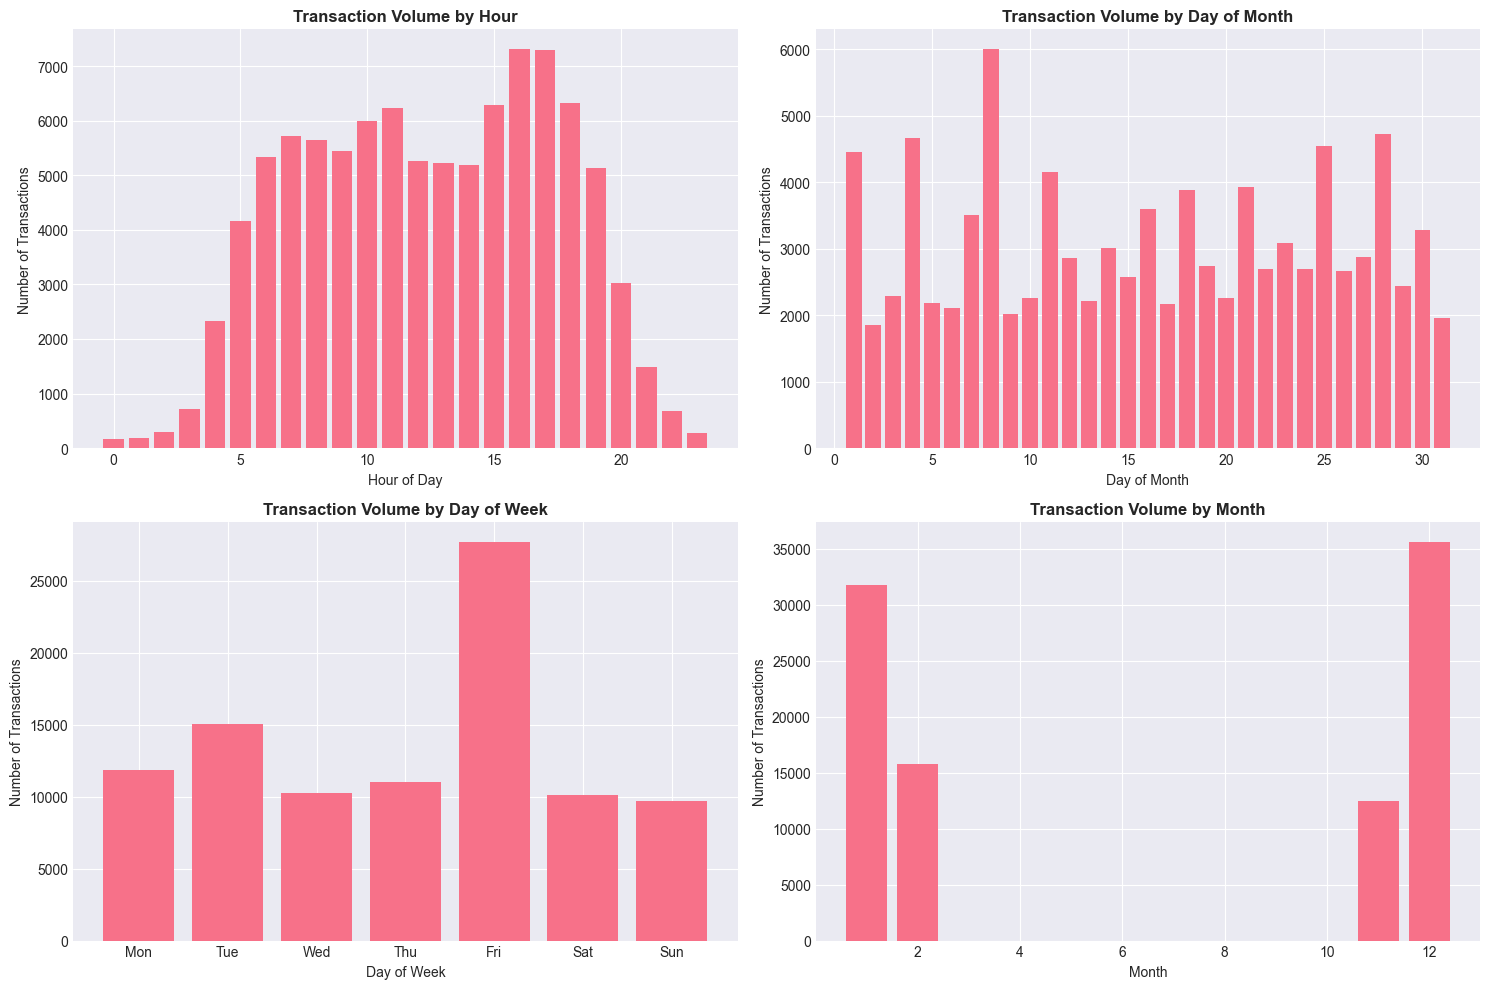

In [11]:

# 8. TIME SERIES ANALYSIS (if TransactionStartTime exists)

if 'TransactionStartTime' in df.columns:
    print("\n" + "="*60)
    print("8. TIME SERIES ANALYSIS")
    print("="*60)
    
    # Convert to datetime
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Extract time features
    df['TransactionHour'] = df['TransactionStartTime'].dt.hour
    df['TransactionDay'] = df['TransactionStartTime'].dt.day
    df['TransactionMonth'] = df['TransactionStartTime'].dt.month
    df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.dayofweek
    
    # Plot transaction volume over time
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Hourly distribution
    hourly_counts = df['TransactionHour'].value_counts().sort_index()
    axes[0, 0].bar(hourly_counts.index, hourly_counts.values)
    axes[0, 0].set_title('Transaction Volume by Hour', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Hour of Day')
    axes[0, 0].set_ylabel('Number of Transactions')
    
    # Daily distribution
    daily_counts = df['TransactionDay'].value_counts().sort_index()
    axes[0, 1].bar(daily_counts.index, daily_counts.values)
    axes[0, 1].set_title('Transaction Volume by Day of Month', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Day of Month')
    axes[0, 1].set_ylabel('Number of Transactions')
    
    # Day of week distribution
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_counts = df['TransactionDayOfWeek'].value_counts().sort_index()
    axes[1, 0].bar(range(len(dow_counts)), dow_counts.values)
    axes[1, 0].set_title('Transaction Volume by Day of Week', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Day of Week')
    axes[1, 0].set_ylabel('Number of Transactions')
    axes[1, 0].set_xticks(range(len(dow_counts)))
    axes[1, 0].set_xticklabels(day_names)
    
    # Monthly distribution
    monthly_counts = df['TransactionMonth'].value_counts().sort_index()
    axes[1, 1].bar(monthly_counts.index, monthly_counts.values)
    axes[1, 1].set_title('Transaction Volume by Month', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Number of Transactions')
    
    plt.tight_layout()
    plt.savefig('../data/processed/time_series_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()



9. FRAUD ANALYSIS
Fraud distribution:
  Non-Fraud (0): 95,469 (99.80%)
  Fraud (1): 193 (0.20%)


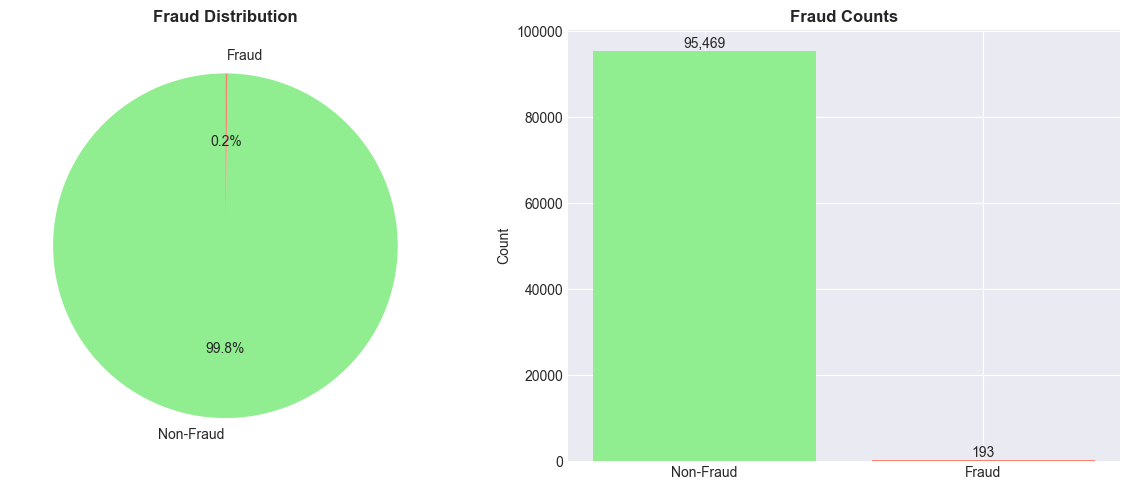

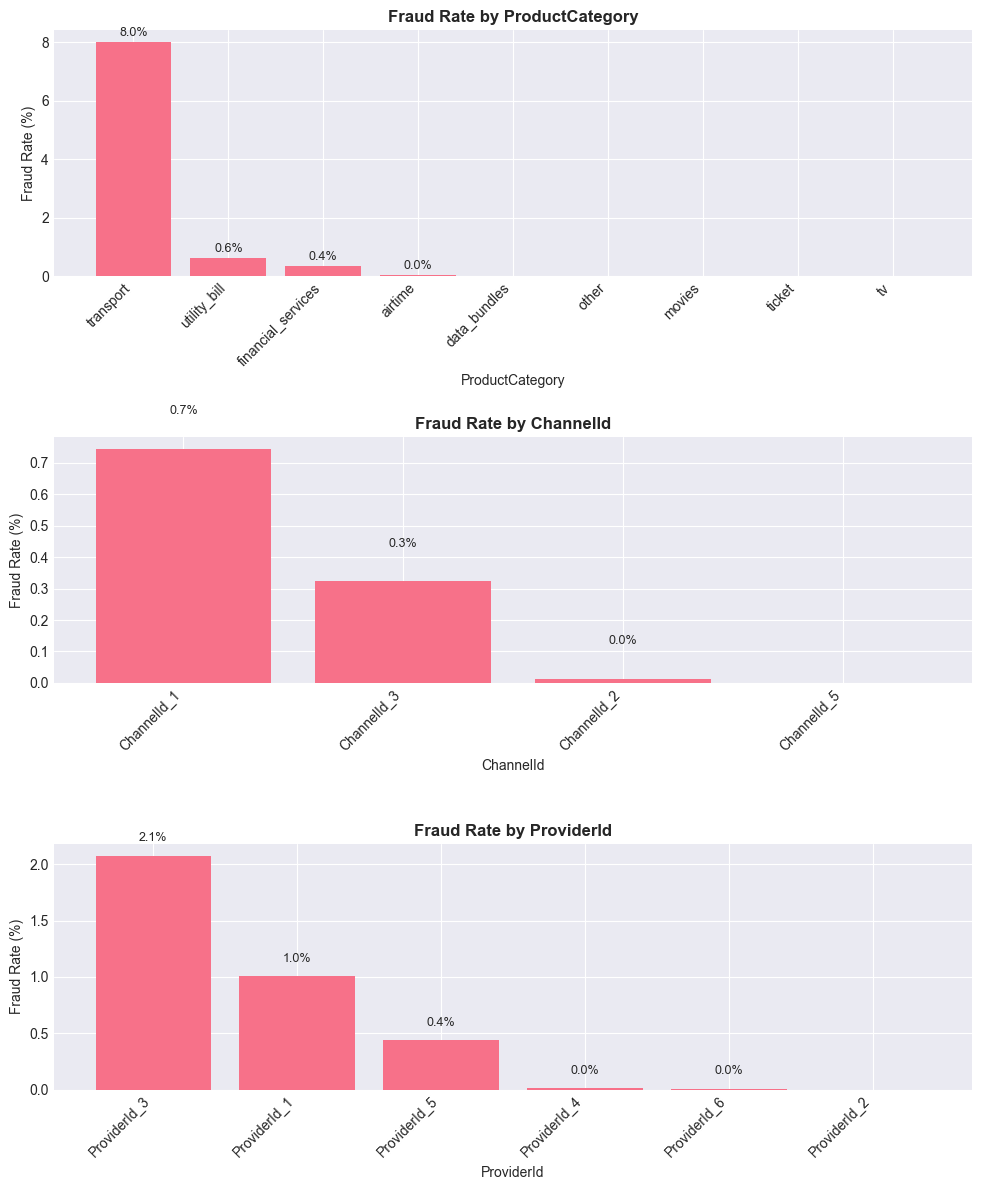

In [12]:

# 9. FRAUD ANALYSIS (if FraudResult exists)

if 'FraudResult' in df.columns:
    print("\n" + "="*60)
    print("9. FRAUD ANALYSIS")
    print("="*60)
    
    fraud_counts = df['FraudResult'].value_counts()
    fraud_percentage = (fraud_counts / len(df)) * 100
    
    print(f"Fraud distribution:")
    print(f"  Non-Fraud (0): {fraud_counts.get(0, 0):,} ({fraud_percentage.get(0, 0):.2f}%)")
    print(f"  Fraud (1): {fraud_counts.get(1, 0):,} ({fraud_percentage.get(1, 0):.2f}%)")
    
    # Plot fraud distribution
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pie chart
    axes[0].pie(fraud_counts.values, labels=['Non-Fraud', 'Fraud'], 
                autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
    axes[0].set_title('Fraud Distribution', fontsize=12, fontweight='bold')
    
    # Bar chart with numerical values
    bars = axes[1].bar(['Non-Fraud', 'Fraud'], fraud_counts.values, 
                      color=['lightgreen', 'salmon'])
    axes[1].set_title('Fraud Counts', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Count')
    
    # Add count labels
    for bar, count in zip(bars, fraud_counts.values):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{count:,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('../data/processed/fraud_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Analyze fraud by different categories
    fraud_by_category = {}
    for col in ['ProductCategory', 'ChannelId', 'ProviderId']:
        if col in df.columns:
            fraud_rate = df.groupby(col)['FraudResult'].mean() * 100
            fraud_by_category[col] = fraud_rate.sort_values(ascending=False)
    
    # Plot fraud rates by category
    if fraud_by_category:
        fig, axes = plt.subplots(len(fraud_by_category), 1, 
                                figsize=(10, 4*len(fraud_by_category)))
        if len(fraud_by_category) == 1:
            axes = [axes]
        
        for idx, (col, fraud_rates) in enumerate(fraud_by_category.items()):
            bars = axes[idx].bar(range(len(fraud_rates)), fraud_rates.values)
            axes[idx].set_title(f'Fraud Rate by {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Fraud Rate (%)')
            axes[idx].set_xticks(range(len(fraud_rates)))
            axes[idx].set_xticklabels(fraud_rates.index, rotation=45, ha='right')
            
            # Add percentage labels
            for bar, rate in zip(bars, fraud_rates.values):
                height = bar.get_height()
                if height > 0:
                    axes[idx].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                                  f'{rate:.1f}%', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.savefig('../data/processed/fraud_by_category.png', dpi=300, bbox_inches='tight')
        plt.show()

In [13]:

# 10. TOP INSIGHTS SUMMARY

print("\n" + "="*60)
print("10. TOP 5 INSIGHTS SUMMARY")
print("="*60)

insights = []

# Insight 1: Data Quality
missing_cols = missing_df[missing_df['Percentage'] > 0].index.tolist()
if missing_cols:
    insights.append(f"1. DATA QUALITY ISSUES: Found missing values in {len(missing_cols)} columns. "
                   f"Columns with >5% missing: {[col for col in missing_cols if missing_df.loc[col, 'Percentage'] > 5]}. "
                   f"Requires imputation strategy.")
else:
    insights.append("1. DATA QUALITY: No missing values detected in the dataset.")

# Insight 2: Fraud Rate
if 'FraudResult' in df.columns:
    fraud_rate = df['FraudResult'].mean() * 100
    insights.append(f"2. CLASS IMBALANCE: Severe class imbalance with only {fraud_rate:.2f}% fraud cases. "
                   f"Requires careful sampling strategy (SMOTE, undersampling, or appropriate metrics like F2-score).")

# Insight 3: Transaction Patterns
if 'TransactionHour' in df.columns:
    peak_hour = df['TransactionHour'].mode()[0]
    insights.append(f"3. TEMPORAL PATTERNS: Peak transaction hour is {peak_hour}:00. "
                   f"Consider time-based features for risk modeling.")

# Insight 4: Outliers
outlier_info = []
for col in key_numerical[:2]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    if len(outliers) > 0:
        outlier_info.append(f"{col}: {len(outliers)} outliers")

if outlier_info:
    insights.append(f"4. OUTLIER DETECTION: Found significant outliers in transaction amounts. "
                   f"{'; '.join(outlier_info)}. Need to decide on capping/winsorizing strategy.")

# Insight 5: Category Distribution
if 'ProductCategory' in df.columns:
    top_category = df['ProductCategory'].value_counts().index[0]
    top_percentage = (df['ProductCategory'].value_counts().iloc[0] / len(df)) * 100
    insights.append(f"5. CATEGORY CONCENTRATION: '{top_category}' dominates with {top_percentage:.1f}% of transactions. "
                   f"Consider product category as important feature for risk assessment.")

# Print insights
for i, insight in enumerate(insights, 1):
    print(f"\n{i}. {insight}")

print("\n" + "="*60)
print("EDA COMPLETED")
print("="*60)
print(f"\nKey recommendations for next steps:")
print("1. Implement robust data preprocessing pipeline")
print("2. Address class imbalance for fraud prediction")
print("3. Engineer time-based and customer behavior features")
print("4. Create customer-level aggregations for credit risk modeling")
print("5. Validate proxy variable definition for credit risk")

# Save processed dataframe for later use
print("\nSaving processed data...")
df.to_csv('../data/processed/processed_data.csv', index=False)
print("Data saved to '../data/processed/processed_data.csv'")


10. TOP 5 INSIGHTS SUMMARY

1. 1. DATA QUALITY: No missing values detected in the dataset.

2. 2. CLASS IMBALANCE: Severe class imbalance with only 0.20% fraud cases. Requires careful sampling strategy (SMOTE, undersampling, or appropriate metrics like F2-score).

3. 3. TEMPORAL PATTERNS: Peak transaction hour is 16:00. Consider time-based features for risk modeling.

4. 4. OUTLIER DETECTION: Found significant outliers in transaction amounts. Amount: 24441 outliers; Value: 9021 outliers. Need to decide on capping/winsorizing strategy.

5. 5. CATEGORY CONCENTRATION: 'financial_services' dominates with 47.5% of transactions. Consider product category as important feature for risk assessment.

EDA COMPLETED

Key recommendations for next steps:
1. Implement robust data preprocessing pipeline
2. Address class imbalance for fraud prediction
3. Engineer time-based and customer behavior features
4. Create customer-level aggregations for credit risk modeling
5. Validate proxy variable definiti